x1 is normla employee stress level, x2 is after after anouncing layoff, x3 is during layoffs.  
Ref :  https://www.youtube.com/watch?v=-yQb_ZJnFXw

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x1 = [2,3,7,2,6]
x2 = [10,8,7,5,10]
x3 = [10,13,14,13,15]

#### Detailed Calculation

In [3]:
u1, u2, u3 = np.mean(x1), np.mean(x2), np.mean(x3)

In [4]:
x = x1 + x2 + x3

In [5]:
u = np.mean(x)

In [6]:
s1, s2, s3 = np.sum((x1-u1)**2), np.sum((x2-u2)**2), np.sum((x3-u3)**2)

In [7]:
sum_of_squares_within = s1 + s2 + s3

In [8]:
total_sum_of_squares  = np.sum((x-u)**2)

In [9]:
uu = [u1, u2, u3]

In [10]:
ll = [len(x1), len(x2), len(x3)]
sum_of_squares_between = 0
for i in range(len(uu)):
    mean = uu[i]
    no_of_samples = ll[i]
    temp = (mean-u)**2
    temp = temp*no_of_samples   # Multiplying with no of sample is important, out final sum consists of contribution from each sample
    sum_of_squares_between += temp

In [11]:
sum_of_squares_within, total_sum_of_squares, sum_of_squares_between

(54.0, 257.33333333333331, 203.33333333333331)

Thing to note above is that they do sum up. 

On high level, F_score = (sum_of_square_between)/(sum_of_square_within)  
Idea is that there should be high variance between groups and low variance within groups.  
We just need to incorporte degree of freedom.   
between_degrees_of_freedom = No_of_groups - 1 = 3 - 1 = 2  
within_degrees_of_freedom = total_no_of_samples - no_og_groups = 15 - 3 = 12

In [12]:
between_degrees_of_freedom, within_degree_of_freedom = 2, 12

In [13]:
numerator, denominator = sum_of_squares_between/between_degrees_of_freedom, sum_of_squares_within/within_degree_of_freedom

In [14]:
F_score = numerator/denominator

In [15]:
F_score

22.592592592592592

In [17]:
stats.f.cdf(F_score, between_degrees_of_freedom, within_degree_of_freedom)

0.99991461407545723

It is beyond 95% of area, so we can reject null hypothesis.

In [18]:
stats.f.ppf(q=1-0.05, dfn=between_degrees_of_freedom, dfd=within_degree_of_freedom)

3.8852938346523933

It is more than 3.88 so we can reject null hypothesis. 

#### Library Function

In [19]:
stats.f_oneway(x1, x2, x3)

F_onewayResult(statistic=22.592592592592592, pvalue=8.538592454274676e-05)

p-value is less than 0.05, so we can reject null hypothesis. 

### Plotting F-distribution

In [23]:
dfn, dfd = 29, 18
mean, var, skew, kurt = stats.f.stats(dfn, dfd, moments='mvsk')

In [24]:
ll = [(30,10), (30,20), (50,10), (50,20), (30,30), (5,2)]
ll = [(5,2), (50,20)]
ll = [(150,20), (20,150)]

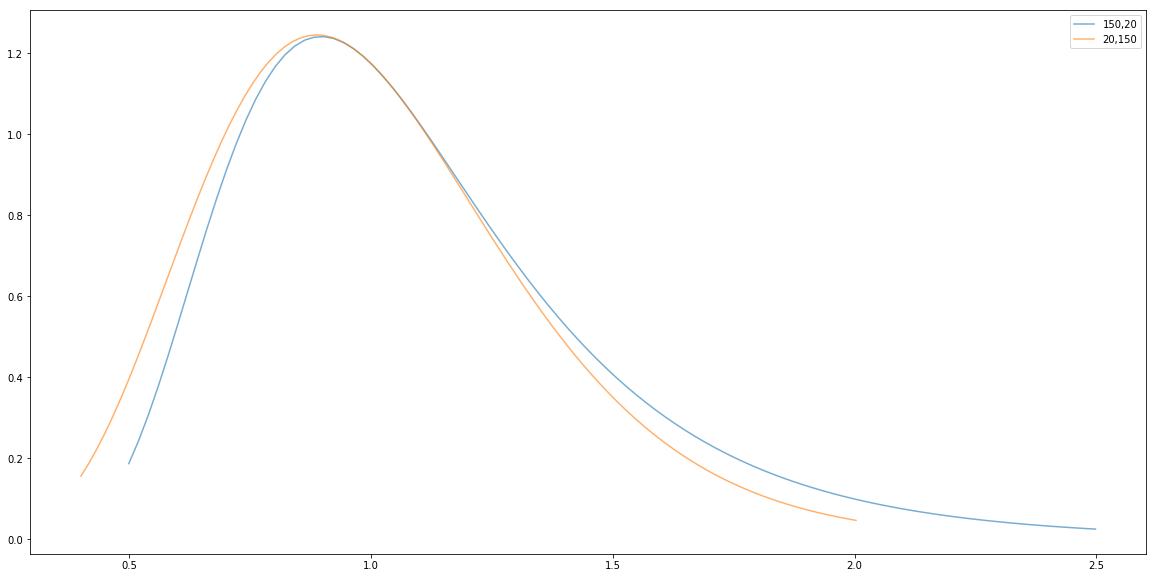

In [26]:
plt.figure(figsize=(20,10))
for dfn, dfd in ll:
    label = str(dfn) + "," + str(dfd)
    x = np.linspace(stats.f.ppf(0.01, dfn, dfd),
                stats.f.ppf(0.99, dfn, dfd), 100)
    plt.plot(x, stats.f.pdf(x, dfn, dfd),
           alpha=0.6, label=label)
plt.legend()